In [52]:
# Relevant Package Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

1.3.5


In [96]:
#Import Data from cluster.csv
db = pd.read_csv('cluster.csv')
db

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4
15587,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,5,4,5,5,2,5,4,3,4,5


In [121]:
#Import Data from cluster.csv
db = pd.read_csv('cluster.csv')
db[db.duplicated(keep = False)]
db.drop_duplicates(inplace = True)
# Changing NA values to median value of year and converting to int32
db['Year_Birth'] = db['Year_Birth'].fillna(db['Year_Birth'].median()).astype(int)
# Converting every column that is int64 to int8 for performance issues
db.iloc[:,(db.dtypes=='int64').values] = db.iloc[:,(db.dtypes=='int64').values].astype(np.int8)
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Churn              15586 non-null  object
 1   Name               15586 non-null  object
 2   Longevity          15586 non-null  object
 3   Year_Birth         15586 non-null  int32 
 4   TypeTravel         15586 non-null  object
 5   RoomType           15586 non-null  object
 6   RewardPoints       15586 non-null  int8  
 7   Comfort            15586 non-null  int8  
 8   ReceptionSchedule  15586 non-null  int8  
 9   FoodDrink          15586 non-null  int8  
 10  Location           15586 non-null  int8  
 11  Wifi               15586 non-null  int8  
 12  Amenities          15586 non-null  int8  
 13  Staff              15586 non-null  int8  
 14  OnlineBooking      15586 non-null  int8  
 15  PriceQuality       15586 non-null  int8  
 16  RoomSpace          15586 non-null  int8 

In [109]:
db.skew() # Skewness higher than 0.5: Amenities, PriceQuality, CheckOut, Cleanliness

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_10228/2128783960.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db.skew() # Shows skewness inferior to 1


Year_Birth          -0.001992
RewardPoints         0.008351
Comfort             -0.100806
ReceptionSchedule   -0.260518
FoodDrink           -0.123543
Location            -0.050057
Wifi                -0.171105
Amenities           -0.599424
Staff               -0.554468
OnlineBooking       -0.472109
PriceQuality        -0.503290
RoomSpace           -0.482872
CheckOut            -0.750667
Checkin             -0.382822
Cleanliness         -0.745109
BarService          -0.358340
dtype: float64

In [120]:
db.kurt() # Kurtosis higher than 1: RewardPoints(-1.17), ReceptionSchedule(1.07), Location(1.07), Wifi(1.11)

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_10228/2949959791.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db.kurt() # Kurtosis higher than 1: RewardPoints(-1.17), ReceptionSchedule(1.07), Location(1.07), Wifi(1.11)


Year_Birth          -0.701207
RewardPoints        -1.178816
Comfort             -0.935490
ReceptionSchedule   -1.077415
FoodDrink           -0.967006
Location            -1.076634
Wifi                -1.111382
Amenities           -0.540790
Staff               -0.859138
OnlineBooking       -0.931961
PriceQuality        -0.772889
RoomSpace           -0.864568
CheckOut            -0.225208
Checkin             -0.812148
Cleanliness         -0.225374
BarService          -0.949633
dtype: float64

In [118]:
db.describe()

,Year_Birth,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
count,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000,15586.000000
mean,1981.696779,-1.150263,2.841332,2.997049,2.844412,2.985821,3.244963,3.374631,3.506288,3.454190,3.459579,3.470871,3.700500,3.327409,3.692288,3.347427
std,15.084697,73.841440,1.388541,1.519035,1.436937,1.299438,1.327064,1.352419,1.319625,1.310401,1.268180,1.293782,1.158693,1.266944,1.154484,1.300371
min,1936.000000,-128.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1970.000000,-65.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,1981.000000,-2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,1994.000000,62.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000
max,2014.000000,127.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [119]:
db['RoomType'].value_counts()

single    7442
double    7019
suite     1125
Name: RoomType, dtype: int64

In [ ]:
# Change longevity y to yes
db['Longevity'] = db['Longevity'].replace('y','yes')
# Churn, Longevity and TypeTravel can be boolean for performence issues

#### Explore Data
- From the start, the only Attribute with missing non-null values is Year_Birth. For storytelling purposes, we should discuss how to explore the narrative here for median vs mode vs mean

- Include in storytelling the type of clients that use all 0 or all 5. Also, check the type of clients that use 1 instead of 0, does that make sense? Is check in and Check out necessary?

- Check how many repeat visits do we have from the potential customers. (Name)


<AxesSubplot:xlabel='CheckOut', ylabel='Count'>

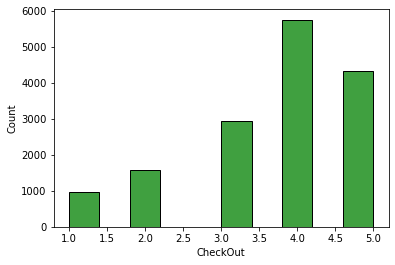

In [111]:
sns.histplot(db['CheckOut'], color="g", bins = 10)